## **Movie Recommendation System using Collborative Filtering and ML**

### **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

In [ ]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [ ]:
movies.head(15)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [ ]:
ratings.head(15)

,userId,movieId,rating,timestamp
0,1,296,5.0,1.147880e+09
1,1,306,3.5,1.147869e+09
2,1,307,5.0,1.147869e+09
3,1,665,5.0,1.147879e+09
4,1,899,3.5,1.147869e+09
5,1,1088,4.0,1.147868e+09
6,1,1175,3.5,1.147869e+09
7,1,1217,3.5,1.147878e+09
8,1,1237,5.0,1.147869e+09
9,1,1250,4.0,1.147868e+09


In [ ]:
movies.describe()

,movieId
count,42518.000000
mean,92539.095536
std,55122.621163
min,1.000000
25%,43801.500000
50%,109739.000000
75%,139696.500000
max,164035.000000


In [ ]:
ratings.describe()

,userId,movieId,rating,timestamp
count,169209.000000,169209.000000,169209.000000,1.692080e+05
mean,624.687983,20015.823502,3.571042,1.196380e+09
std,341.479634,37736.739836,1.043787,2.334153e+08
min,1.000000,1.000000,0.500000,8.280963e+08
25%,333.000000,1090.000000,3.000000,9.807988e+08
50%,639.000000,2712.000000,4.000000,1.162684e+09
75%,904.000000,7371.000000,4.000000,1.439794e+09
max,1203.000000,208002.000000,5.000000,1.574254e+09


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42518 entries, 0 to 42517
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  42518 non-null  int64 
 1   title    42518 non-null  object
 2   genres   42517 non-null  object
dtypes: int64(1), object(2)
memory usage: 996.6+ KB


In [ ]:
movies.shape

(42518, 3)

In [ ]:
ratings.shape

(169209, 4)

In [ ]:
movies.isna().sum()

movieId    0
title      0
genres     1
dtype: int64

In [ ]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    1
dtype: int64

### **EDA for Movie Recommendation System**

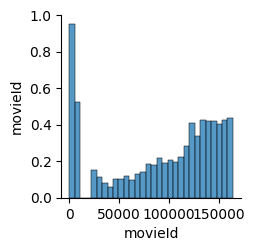

In [ ]:
sns.pairplot(movies)

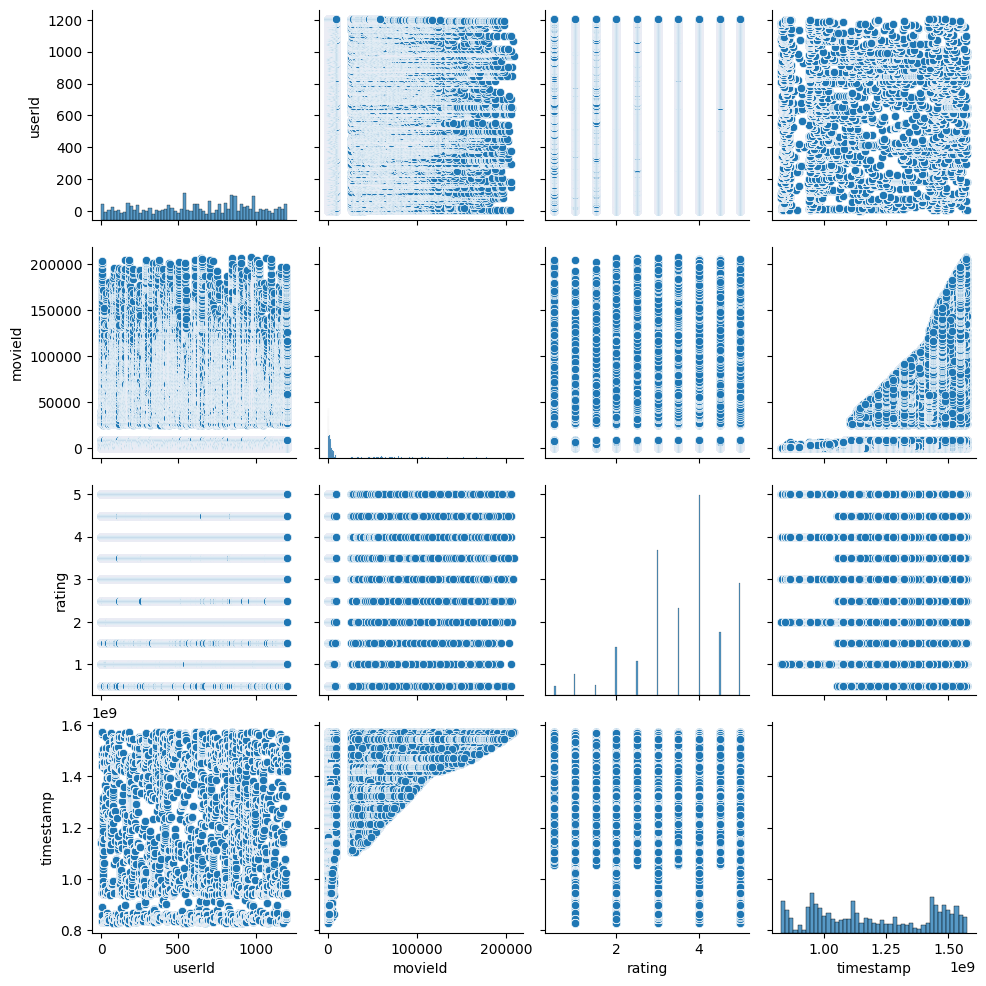

In [ ]:
sns.pairplot(ratings)

<Axes: xlabel='rating', ylabel='Count'>

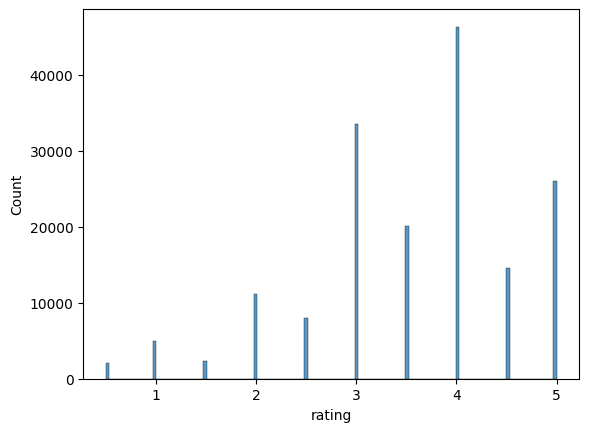

In [ ]:
sns.histplot(ratings['rating'])

<Axes: >

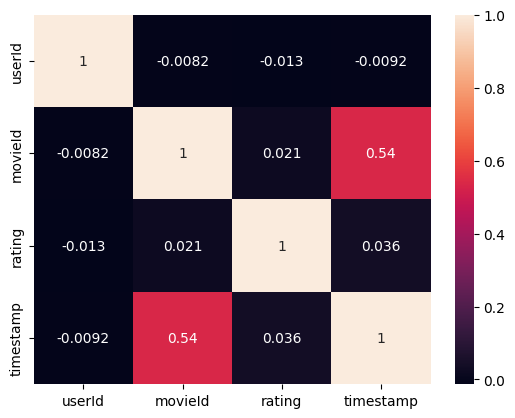

In [ ]:
sns.heatmap(ratings.corr(),annot=True)

In [ ]:
ratings.corr()

,userId,movieId,rating,timestamp
userId,1.000000,-0.008167,-0.013202,-0.009217
movieId,-0.008167,1.000000,0.021243,0.535599
rating,-0.013202,0.021243,1.000000,0.035521
timestamp,-0.009217,0.535599,0.035521,1.000000


### **Popularity Based Recommender System**

In [ ]:
ratings = ratings.merge(movies,on='movieId')

In [ ]:
ratings.merge(movies,on='movieId')

,userId,movieId,rating,timestamp,title_x,genres_x,title_y,genres_y
0,1,296,5.0,1.147880e+09,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,3,296,5.0,1.439474e+09,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,4,296,4.0,1.573939e+09,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,5,296,4.0,8.307862e+08,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,7,296,4.0,8.354447e+08,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
...,...,...,...,...,...,...,...,...
167207,1203,43923,3.0,1.421540e+09,Tyler Perry's Madea's Family Reunion (2006),Comedy|Drama,Tyler Perry's Madea's Family Reunion (2006),Comedy|Drama
167208,1203,50158,4.0,1.421990e+09,Stomp the Yard (2007),Drama|Musical,Stomp the Yard (2007),Drama|Musical
167209,1203,51082,4.0,1.437578e+09,Tyler Perry's Daddy's Little Girls (2007),Comedy|Romance,Tyler Perry's Daddy's Little Girls (2007),Comedy|Romance
167210,1203,51520,2.0,1.437526e+09,Teen Wolf Too (1987),Comedy,Teen Wolf Too (1987),Comedy


In [ ]:
num_rating=ratings.groupby('title').count()['rating'].reset_index()
num_rating.rename(columns={'rating':'num_rating'},inplace=True)
num_rating

,title,num_rating
0,$5 a Day (2008),1
1,'71 (2014),2
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),2
4,'Til There Was You (1997),3
...,...,...
11452,loudQUIETloud: A Film About the Pixies (2006),1
11453,xXx (2002),41
11454,xXx: State of the Union (2005),5
11455,¡Three Amigos! (1986),46


In [ ]:
ratings['rating'] = pd.to_numeric(ratings['rating'], errors='coerce')

In [ ]:
ratings.dropna(subset=['rating'], inplace=True)

In [ ]:
avg_rating = ratings.groupby('title')['rating'].mean().reset_index()

In [ ]:
avg_rating.rename(columns={'rating': 'avg_rating'}, inplace=True)

In [ ]:
avg_rating

,title,avg_rating
0,$5 a Day (2008),4.000000
1,'71 (2014),2.500000
2,'Round Midnight (1986),4.000000
3,'Salem's Lot (2004),3.000000
4,'Til There Was You (1997),3.000000
...,...,...
11452,loudQUIETloud: A Film About the Pixies (2006),3.500000
11453,xXx (2002),2.902439
11454,xXx: State of the Union (2005),2.100000
11455,¡Three Amigos! (1986),2.978261


In [ ]:
popular=num_rating.merge(avg_rating,on='title')
popular

,title,num_rating,avg_rating
0,$5 a Day (2008),1,4.000000
1,'71 (2014),2,2.500000
2,'Round Midnight (1986),2,4.000000
3,'Salem's Lot (2004),2,3.000000
4,'Til There Was You (1997),3,3.000000
...,...,...,...
11452,loudQUIETloud: A Film About the Pixies (2006),1,3.500000
11453,xXx (2002),41,2.902439
11454,xXx: State of the Union (2005),5,2.100000
11455,¡Three Amigos! (1986),46,2.978261


In [ ]:
popular=popular[popular['num_rating']>=250].sort_values('avg_rating',ascending=False).head(50)

In [ ]:
popular = popular.merge(movies,on='title')

In [ ]:
popular

,title,num_rating,avg_rating,movieId,genres
0,"Shawshank Redemption, The (1994)",571,4.442207,318,Crime|Drama
1,"Usual Suspects, The (1995)",410,4.406098,50,Crime|Mystery|Thriller
2,"Godfather, The (1972)",363,4.362259,858,Crime|Drama
3,Schindler's List (1993),441,4.299320,527,Drama|War
4,Fight Club (1999),411,4.257908,2959,Action|Crime|Drama|Thriller
5,Inception (2010),264,4.240530,79132,Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX
6,"Princess Bride, The (1987)",266,4.216165,1197,Action|Adventure|Comedy|Fantasy|Romance
7,Pulp Fiction (1994),581,4.198795,296,Comedy|Crime|Drama|Thriller
8,Memento (2000),273,4.183150,4226,Mystery|Thriller
9,"Matrix, The (1999)",525,4.180000,2571,Action|Sci-Fi|Thriller


In [ ]:
popular.merge(movies,on='title').shape

(53, 7)

### **Collaborative Filtering Based Recommender System**


In [ ]:
X = ratings.groupby('userId').count()['rating']>200
educated_users = X[X].index

In [ ]:
filtered_rating = ratings[ratings['userId'].isin(educated_users)]

In [ ]:
y = filtered_rating.groupby('title').count()['rating']>=50
famous_movie = y[y].index

In [ ]:
final_ratings = filtered_rating[filtered_rating['title'].isin(famous_movie)]

In [ ]:
pt = final_ratings.pivot_table(index='title',columns='userId',values='rating')

In [ ]:
pt.fillna(0,inplace=True)

In [ ]:
pt

userId,3,4,12,13,19,23,31,38,43,57,...,1156,1157,1168,1171,1173,1184,1187,1189,1202,1203
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,4.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.5
2001: A Space Odyssey (1968),5.0,4.0,0.0,3.5,5.0,4.0,1.0,0.0,3.5,0.0,...,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0
28 Days Later (2002),3.0,0.0,4.0,5.0,4.0,0.0,2.0,3.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0
300 (2007),4.0,0.0,0.0,4.0,3.0,0.0,2.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"X-Files: Fight the Future, The (1998)",4.0,0.0,0.0,0.0,3.0,0.0,0.0,3.5,0.0,4.5,...,0.0,0.0,0.0,0.0,3.0,4.0,0.0,0.0,0.0,3.5
X-Men (2000),4.0,1.5,2.0,4.0,2.0,0.0,1.5,3.0,3.5,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,2.5,0.0,0.0,4.0
X2: X-Men United (2003),4.0,0.0,0.0,3.5,3.0,0.0,1.5,2.5,3.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [ ]:
similarity_scores = cosine_similarity(pt)

In [ ]:
similarity_scores.shape

(413, 413)

In [ ]:
def recommend(movie_name):

  index = np.where(pt.index=='movie_name')[0]
  similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda X:X[1],reverse=True)[:10]

  for i in similar_items:
    print(pt.index[i[0]])

In [ ]:
sorted(list(enumerate(similarity_scores[0])),key=lambda X:X[1],reverse=True)[1:6]

[(268, 0.5368117981097624),
 (411, 0.5359273315929037),
 (65, 0.5241020228961403),
 (247, 0.5101623444385922),
 (78, 0.48903408197365433)]

In [ ]:
pt.index[411]

"You've Got Mail (1998)"

In [ ]:
popular2 = popular.copy()

In [ ]:
popular2.loc[ (popular2['avg_rating']>=0)&(popular2['avg_rating']<=1),'rating_between'] = "between 0 and 1"
popular2.loc[ (popular2['avg_rating']>1)&(popular2['avg_rating']<=2),'rating_between'] = "between 1 and 2"
popular2.loc[ (popular2['avg_rating']>2)&(popular2['avg_rating']<=3),'rating_between'] = "between 2 and 3"
popular2.loc[ (popular2['avg_rating']>3)&(popular2['avg_rating']<=4),'rating_between'] = "between 3 and 4"
popular2.loc[ (popular2['avg_rating']>4)&(popular2['avg_rating']<=5),'rating_between'] = "between 4 and 5"

In [ ]:
ratings = pd.get_dummies(popular2['rating_between'])

In [ ]:
features = pd.concat([popular2['avg_rating']], axis=1)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
features = scaler.fit_transform(features)

In [ ]:
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(features)
dist, idlist = model.kneighbors(features)

In [ ]:
movie = 'Usual Suspects, The (1995)'

In [ ]:
id_m = popular2[popular2['title']==movie].index

In [ ]:
id_m

Index([1], dtype='int64')

In [ ]:
id_m[0]

1

In [ ]:
movie = []

In [ ]:
def recommend_movie(movie_index, num_recommendations=3):
    movie_ratings = X[movie_index].reshape(1, -1)
    distances, indices = model.kneighbors(movie_ratings)
    recommended_movies = []
    for i in range(1, num_recommendations + 1):
        recommended_movies.append(popular2.iloc[indices.flatten()[i]]['title'])
    return recommended_movies

In [ ]:
recommended_movies = recommend_movie(1)
print('Usual Suspects, The (1995)')

Usual Suspects, The (1995)


In [ ]:
recommended_movies

['Men in Black (a.k.a. MIB) (1997)',
 'Jurassic Park (1993)',
 'Pirates of the Caribbean: The Curse of the Black Pearl (2003)']